In [ ]:
#219014298
#Demisha Govender
'''This notebook contains code for the implementation of the benchmarks model(LSTM Model).
With the chosen 10% of missing values in the dataset and the chosen MICE method to handle the missing values. Theses desired values and techniques
were chosen after running multiple experiments in the experiment notebook to determine the optimal percentage of missing values and the imputation technique to use.'''
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pylab
import matplotlib.patches as mpatches
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.layers import Dense
from keras.layers import LSTM
from numpy import sqrt 

In [ ]:
df1 = pd.read_csv("/home/household_power_consumption.txt",delimiter=";")
df1["datetime"] = df1[["Date","Time"]].apply(lambda x: x[0]+" "+x[1],axis=1)
df1["datetime"] = pd.to_datetime(df1["datetime"], infer_datetime_format=True)
df1 = df1.drop(["Date","Time"],axis=1)
df1.index = df1["datetime"]
df1 = df1.drop("datetime",axis=1)
df1 = df1.apply(lambda x: pd.to_numeric(x, errors='coerce'))
dff = df1.copy(deep=True)
print(df1)

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2007-01-08 01:52:00                1.344                  0.106   239.24   
2007-01-08 01:53:00                1.286                  0.000   239.32   
2007-01-08 01:54:00                1.278                  0.000   240.35   
2007-01-08 01:55:00                1.294                  0.000   240.06   
2007-01-08 01:56:00                1.282                  0.000   239.89   

           

In [ ]:
#Different Percentage of missing values
gapminder_NaN10 = df1.mask(np.random.random(df1.shape)<0.014)
gapminder_NaN20 = df1.mask(np.random.random(df1.shape)<0.02857)
gapminder_NaN30 = df1.mask(np.random.random(df1.shape)<0.04286)
gapminder_NaN40 = df1.mask(np.random.random(df1.shape)<0.05714)
gapminder_NaN50 = df1.mask(np.random.random(df1.shape)<0.0714)

#Write the different percentages to a new file
gapminder_NaN10.to_csv('10.csv')
gapminder_NaN20.to_csv('20.csv')
gapminder_NaN30.to_csv('30.csv')
gapminder_NaN40.to_csv('40.csv')
gapminder_NaN50.to_csv('50.csv')

#Read the different Percentage files-10% was choosen
df= pd.read_csv('/content/10.csv', header=0, index_col=0)
#df= pd.read_csv('/content/20.csv', header=0, index_col=0)
#df= pd.read_csv('/content/30.csv', header=0, index_col=0)
#df= pd.read_csv('/content/40.csv', header=0, index_col=0)
#df= pd.read_csv('/content/50.csv', header=0, index_col=0)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2007-01-08 01:52:00,1.344,0.106,239.24,5.6,0.0,0.0,17.0
2007-01-08 01:53:00,1.286,0.000,239.32,5.4,0.0,0.0,18.0
2007-01-08 01:54:00,1.278,0.000,240.35,5.2,0.0,0.0,17.0


In [ ]:
df.shape

(32193, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32193 entries, 2006-12-16 17:24:00 to 2007-01-08 01:56:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    31744 non-null  float64
 1   Global_reactive_power  31727 non-null  float64
 2   Voltage                31750 non-null  float64
 3   Global_intensity       31741 non-null  float64
 4   Sub_metering_1         31747 non-null  float64
 5   Sub_metering_2         31695 non-null  float64
 6   Sub_metering_3         31734 non-null  float64
dtypes: float64(7)
memory usage: 2.0+ MB


In [ ]:
#df.isnull().sum()
df.isna().sum()

Global_active_power      449
Global_reactive_power    466
Voltage                  443
Global_intensity         452
Sub_metering_1           446
Sub_metering_2           498
Sub_metering_3           459
dtype: int64

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-01-08 01:52:00,1.344,0.106,239.24,5.6,0.0,0.0,17.0
2007-01-08 01:53:00,1.286,0.000,239.32,5.4,0.0,0.0,18.0
2007-01-08 01:54:00,1.278,0.000,240.35,5.2,0.0,0.0,17.0
2007-01-08 01:55:00,1.294,0.000,240.06,5.4,0.0,0.0,18.0
2007-01-08 01:56:00,1.282,0.000,239.89,5.2,0.0,NaN,NaN


In [ ]:
#missing values handle-Percentage in each column
def missingValuesPercentageTable(df):
        missVal = df.isna().sum()
        missValPercent =  df.isna().sum() / len(df) *100 
        missValTable = pd.concat([missVal, missValPercent], axis=1)
        missValTableColumns = missValTable.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        missValTableColumns = missValTableColumns[
            missValTableColumns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(4)
        print ("The selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(missValTableColumns.shape[0]) +
              " columns that have missing values.")
        
        return missValTableColumns

In [ ]:
missingPercentage= missingValuesPercentageTable(df)
missingPercentage

The selected dataframe has 7 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Sub_metering_2,498,1.5469
Global_reactive_power,466,1.4475
Sub_metering_3,459,1.4258
Global_intensity,452,1.4040
Global_active_power,449,1.3947
Sub_metering_1,446,1.3854
Voltage,443,1.3761


Different ways to handle the missing data


In [ ]:
#baseline for imputation
#Drop missing values
import statsmodels.api as sm
baselineImputation= df.dropna(how='any')
#Exclude the target variable
X=sm.add_constant(baselineImputation.iloc[:,1:])
y=baselineImputation['Global_active_power']
lm=sm.OLS(y,X).fit()
#print(baselineImputation.iloc[:,1:])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Method 1
#Handling the missing data using MICE
HandleMVM = df.copy(deep=True)
HandleMVMM = dff.copy(deep=True)
mice_imputer = IterativeImputer()
HandleMVM['Global_active_power'] = mice_imputer.fit_transform(HandleMVM[['Global_active_power']])
HandleMVM['Global_reactive_power'] = mice_imputer.fit_transform(HandleMVM[['Global_reactive_power']])
HandleMVM['Voltage'] = mice_imputer.fit_transform(HandleMVM[['Voltage']])
HandleMVM['Global_intensity'] = mice_imputer.fit_transform(HandleMVM[['Global_intensity']])
HandleMVM['Sub_metering_1'] = mice_imputer.fit_transform(HandleMVM[['Sub_metering_1']])
HandleMVM['Sub_metering_2'] = mice_imputer.fit_transform(HandleMVM[['Sub_metering_2']])
HandleMVM['Sub_metering_3'] = mice_imputer.fit_transform(HandleMVM[['Sub_metering_3']])
HandleMVMM['Global_active_power'] = mice_imputer.fit_transform(HandleMVMM[['Global_active_power']])
HandleMVMM['Global_reactive_power'] = mice_imputer.fit_transform(HandleMVMM[['Global_reactive_power']])
HandleMVMM['Voltage'] = mice_imputer.fit_transform(HandleMVMM[['Voltage']])
HandleMVMM['Global_intensity'] = mice_imputer.fit_transform(HandleMVM[['Global_intensity']])
HandleMVMM['Sub_metering_1'] = mice_imputer.fit_transform(HandleMVMM[['Sub_metering_1']])
HandleMVM['Sub_metering_2'] = mice_imputer.fit_transform(HandleMVMM[['Sub_metering_2']])
HandleMVMM['Sub_metering_3'] = mice_imputer.fit_transform(HandleMVMM[['Sub_metering_3']])
X= sm.add_constant(HandleMVM.iloc[:,1:])
y=HandleMVM['Global_active_power']
lm_mice=sm.OLS(y,X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Method 3
#Handling the missing data using using Mean Imputation
HandleMV= df.copy(deep=True)
HandleMV.fillna(HandleMV.mean(),inplace=True)
X= sm.add_constant(HandleMV.iloc[:,1:])
y=HandleMV['Global_active_power']
lm_mean=sm.OLS(y,X).fit()

In [ ]:
#Method 4
#Handling the missing data using K-Nearest Neighbor Imputation
from sklearn.impute import KNNImputer
HandleMVK = df.copy(deep=True)
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
HandleMVK['Global_active_power'] = knn_imputer.fit_transform(HandleMVK[['Global_active_power']])
HandleMVK['Global_reactive_power'] = knn_imputer.fit_transform(HandleMVK[['Global_reactive_power']])
HandleMVK['Voltage'] = knn_imputer.fit_transform(HandleMVK[['Voltage']])
HandleMVK['Global_intensity'] = knn_imputer.fit_transform(HandleMVK[['Global_intensity']])
HandleMVK['Sub_metering_1'] = knn_imputer.fit_transform(HandleMVK[['Sub_metering_1']])
HandleMVK['Sub_metering_2'] = knn_imputer.fit_transform(HandleMVK[['Sub_metering_2']])
HandleMVK['Sub_metering_3'] =knn_imputer.fit_transform(HandleMVK[['Sub_metering_3']])
X= sm.add_constant(HandleMVK.iloc[:,1:])
y=HandleMVK['Global_active_power']
lm_knn=sm.OLS(y,X).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Evaluating the impuatation performance
print(pd.DataFrame({'baseline':lm.rsquared_adj,
                    'MICE':lm_mice.rsquared_adj,
                    #'Ffill':lm_ffill.rsquared_adj,
                    'Mean':lm_mean.rsquared_adj,
                    'KNN':lm_knn.rsquared_adj},
                   index=['R_squared_adj']))

               baseline      MICE      Mean       KNN
R_squared_adj    0.9979  0.970212  0.970211  0.970211


In [ ]:
#Check to see if the missing values have been handled
HandleMVM.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
HandleMVM.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
HandleMVM.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-01-08 01:52:00,1.344,0.106,239.24,5.6,0.0,0.000000,17.000000
2007-01-08 01:53:00,1.286,0.000,239.32,5.4,0.0,0.000000,18.000000
2007-01-08 01:54:00,1.278,0.000,240.35,5.2,0.0,0.000000,17.000000
2007-01-08 01:55:00,1.294,0.000,240.06,5.4,0.0,0.000000,18.000000
2007-01-08 01:56:00,1.282,0.000,239.89,5.2,0.0,2.060954,6.813575


In [ ]:
#Create a new column called sub_metering_4
# add a column for for the remainder of sub metering
HandleMVM['Sub_metering_4'] = (HandleMVM['Global_active_power']*1000 /60 ) -  (HandleMVM['Sub_metering_1'] + HandleMVM['Sub_metering_2'] + HandleMVM['Sub_metering_3'])
HandleMVMM['Sub_metering_4'] = (HandleMVMM['Global_active_power']*1000 /60 ) -  (HandleMVMM['Sub_metering_1'] + HandleMVMM['Sub_metering_2'] + HandleMVMM['Sub_metering_3'])

Stationarity Test

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(HandleMVM['Global_active_power'],"Global_active_power")
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Global_reactive_power'],"Global_reactive_power",)
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Voltage'],"Voltage")
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Global_intensity'],"Global_intensity")
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Sub_metering_1'],"Sub_metering_1" )
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Sub_metering_2'],"Sub_metering_2",)
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Sub_metering_3'],"Sub_metering_3")
print()
Augmented_Dickey_Fuller_Test_func(HandleMVM['Sub_metering_4'],"Sub_metering_4")

Results of Dickey-Fuller Test for column: Global_active_power
Test Statistic                -9.591584e+00
p-value                        2.029302e-16
No Lags Used                   5.000000e+01
Number of Observations Used    3.214200e+04
Critical Value (1%)           -3.430553e+00
Critical Value (5%)           -2.861630e+00
Critical Value (10%)          -2.566818e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary

Results of Dickey-Fuller Test for column: Global_reactive_power
Test Statistic                   -18.872864
p-value                            0.000000
No Lags Used                      47.000000
Number of Observations Used    32145.000000
Critical Value (1%)               -3.430553
Critical Value (5%)               -2.861630
Critical Value (10%)              -2.566818
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary

Results of Dickey-Fuller Test for column: Voltage
Test Statistic                -8.924102e+00
p-valu

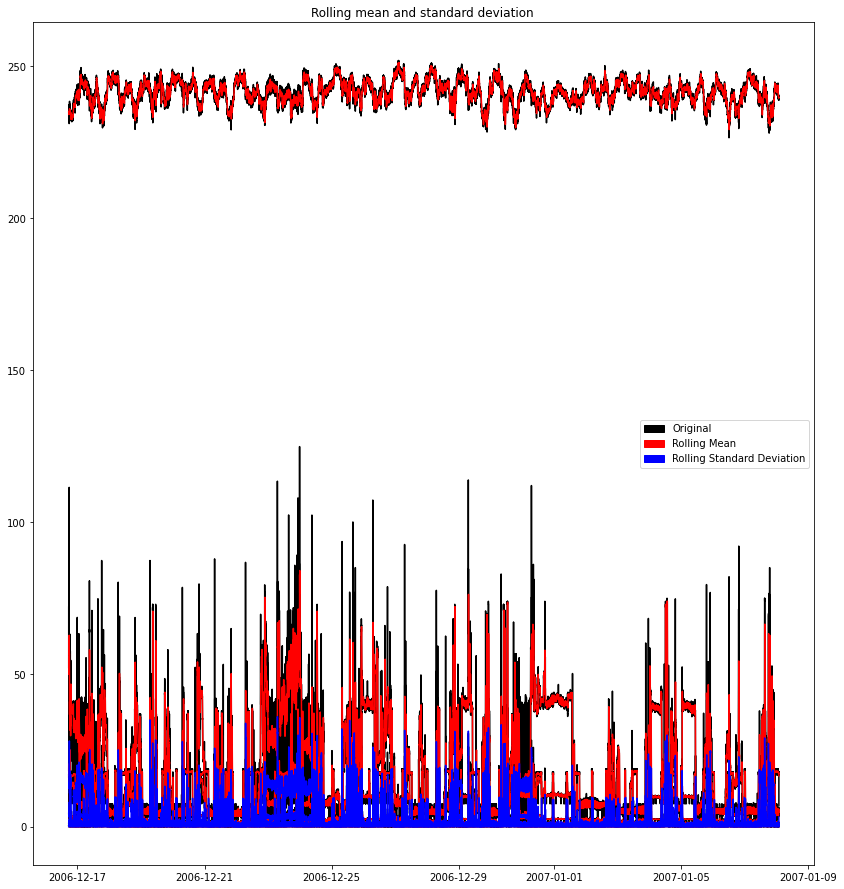

In [ ]:
#Rolling mean and standard deviation for all variables in the dataset.
plt.rcParams["figure.figsize"] = (14,15.5)
index=HandleMVMM
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
#pylab.legend([orig],['Original'],loc = 'best')
#plt.legend(loc=9)
black_patch = mpatches.Patch(color='black', label='Original')
#pylab.legend(handles=[black_patch])
red_patch = mpatches.Patch(color='red', label='Rolling Mean')
blue_patch = mpatches.Patch(color='blue', label='Rolling Standard Deviation')
pylab.legend(handles=[black_patch,red_patch,blue_patch])
plt.title("Rolling mean and standard deviation ")
plt.show(block=False)



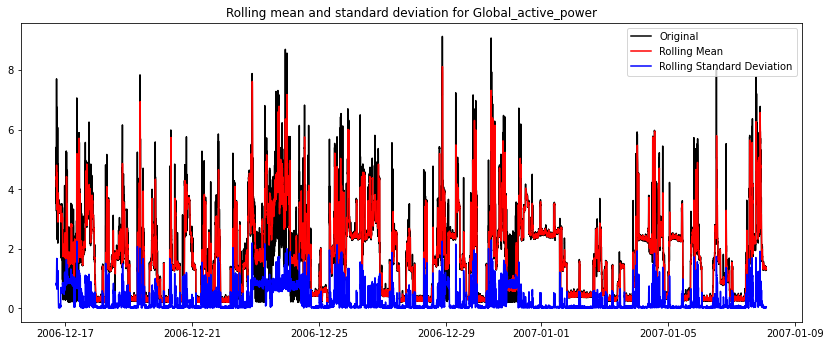

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Global_active_power']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Global_active_power")
plt.show(block=False)

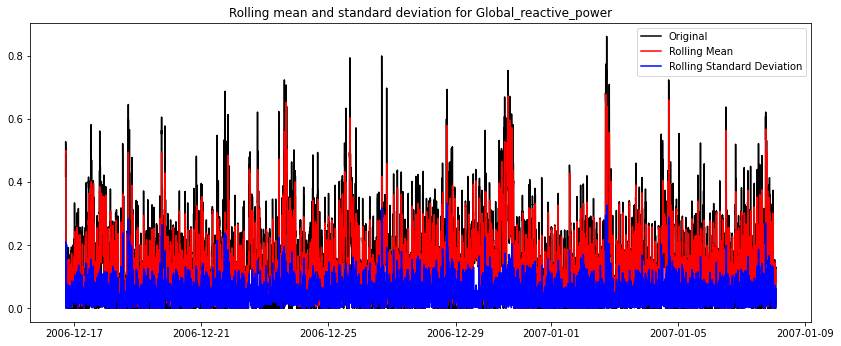

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Global_reactive_power']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Global_reactive_power")
plt.show(block=False)

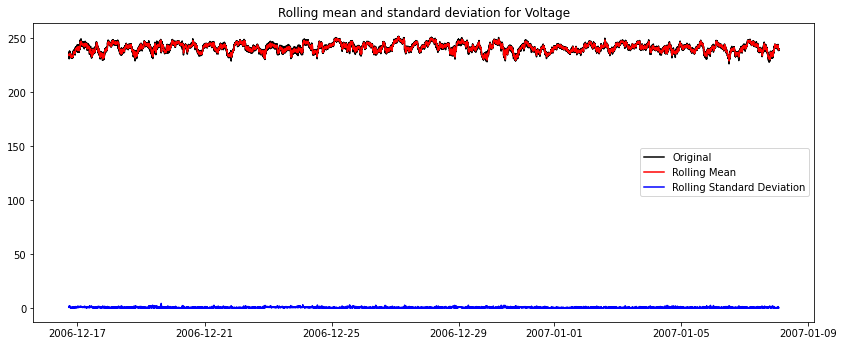

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Voltage']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Voltage")
plt.show(block=False)

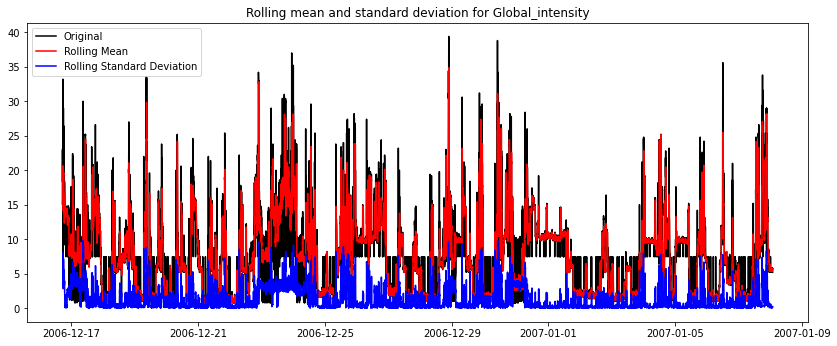

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Global_intensity']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Global_intensity")
plt.show(block=False)

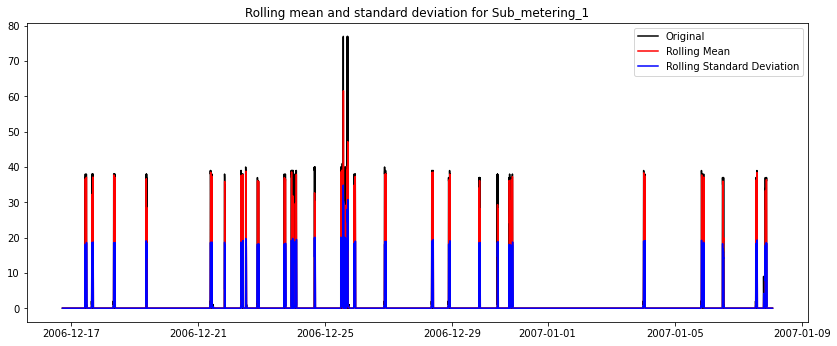

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Sub_metering_1']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Sub_metering_1")
plt.show(block=False)

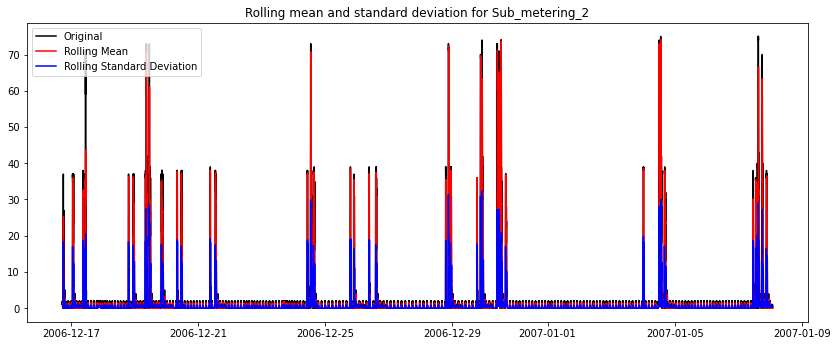

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Sub_metering_2']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Sub_metering_2")
plt.show(block=False)

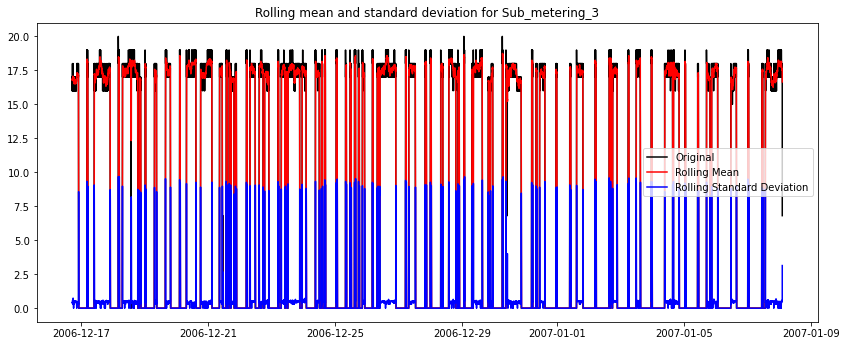

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Sub_metering_3']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Sub_metering_3")
plt.show(block=False)

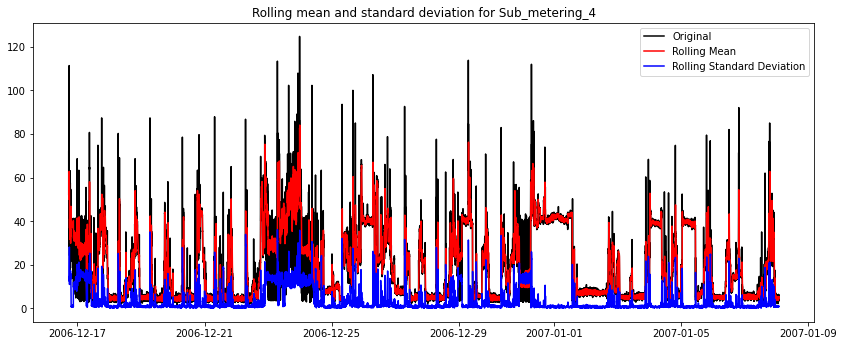

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
index=HandleMVMM['Sub_metering_4']
rmean=index.rolling(window=12).mean()
rstd=index.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(index , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation for Sub_metering_4")
plt.show(block=False)

In [ ]:
HandleMVM.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


Visualization of time series data

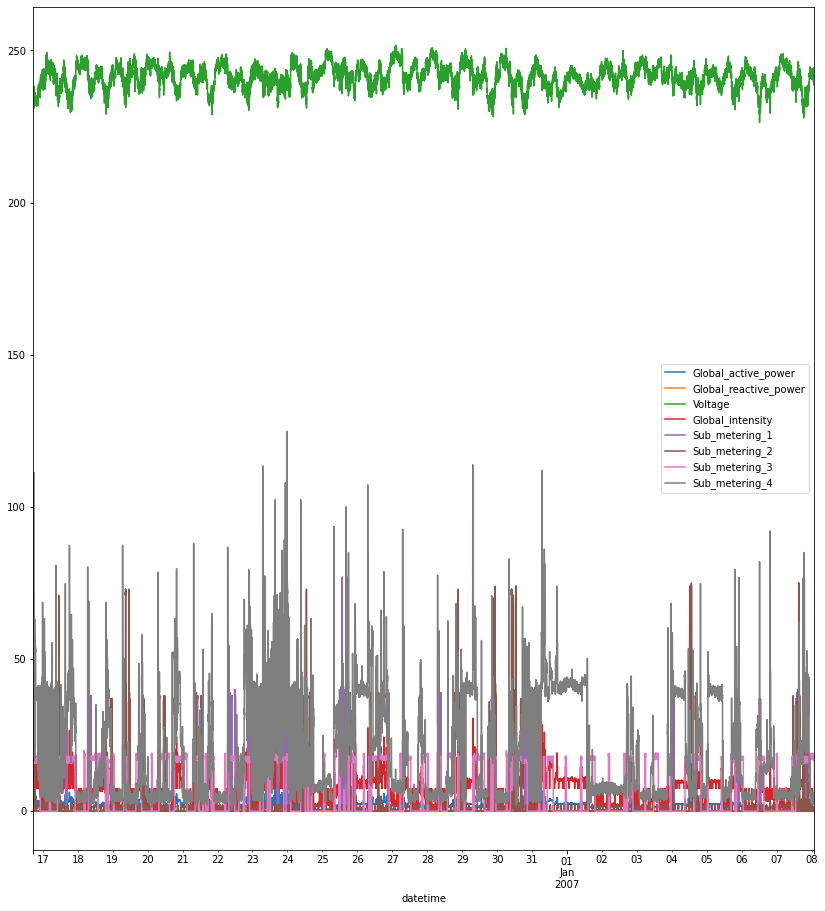

In [ ]:
plt.rcParams["figure.figsize"] = (14,15.5)
HandleMVMM.plot()

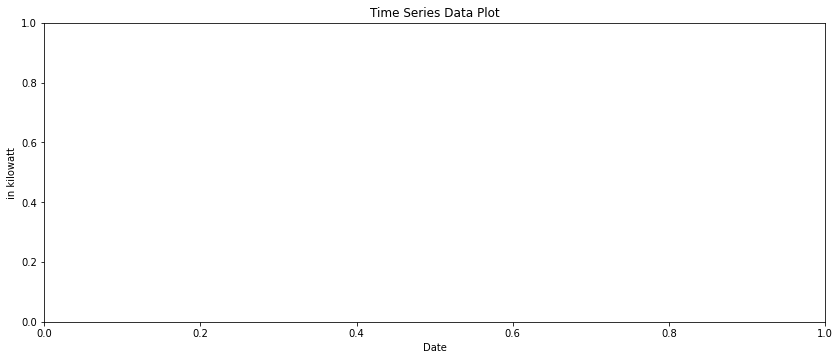

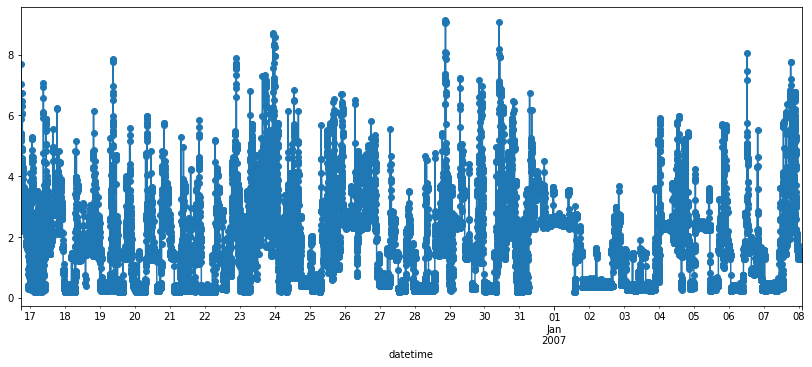

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,5.5)
t=HandleMVMM["Global_active_power"]
#plt.plot(t, marker='o')
plt.xlabel("Date")
plt.ylabel("in kilowatt")
plt.title("Time Series Data Plot")
plt.show()
t.plot(marker='o')

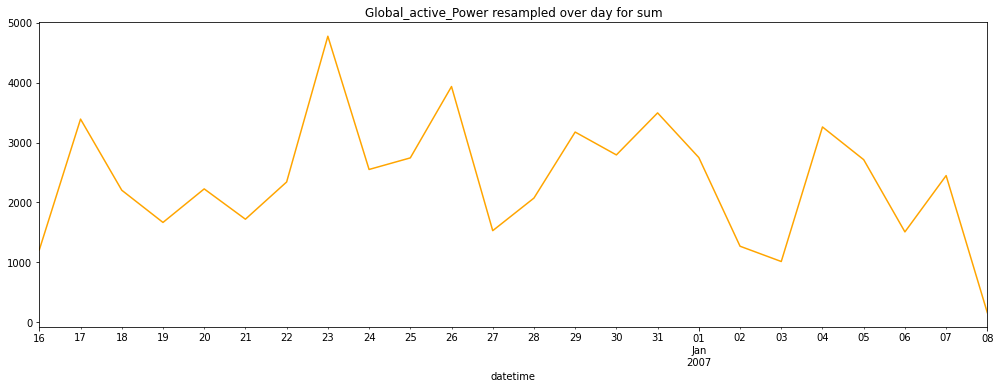

[]

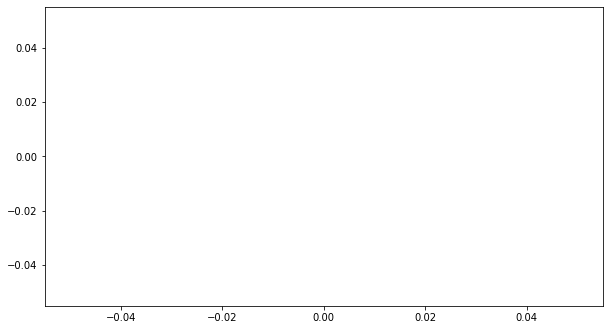

In [ ]:
HandleMVMM.Global_active_power.resample("D").sum().plot(title="Global_active_Power resampled over day for sum",color='orange')
plt.rcParams["figure.figsize"] = (10,5.5)
plt.tight_layout()
plt.show()
plt.plot()

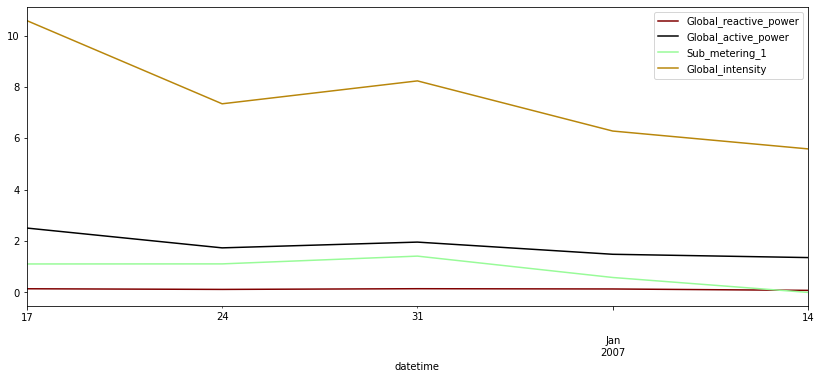

In [ ]:
# resampling over week and computing mean 
plt.rcParams["figure.figsize"] = (14,5.5)
HandleMVMM.Global_reactive_power.resample('W').mean().plot(color='Maroon',legend=True)
HandleMVMM.Global_active_power.resample('W').mean().plot(color='black', legend=True)
HandleMVMM.Sub_metering_1.resample('W').mean().plot(color='PaleGreen',legend=True)
HandleMVMM.Global_intensity.resample("W").mean().plot(color='DarkGoldenrod',legend=True)
plt.show()

Number of measurements: 32193


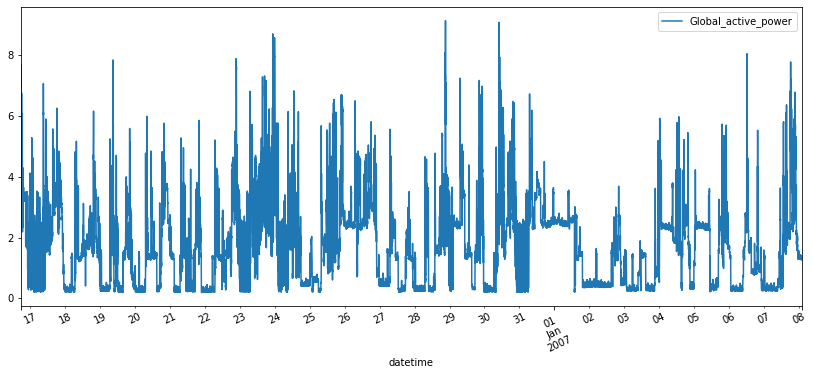

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,5.5)
#Ploting temperature in Celsius degrees
print("Number of measurements: "+str(len(HandleMVM['Global_active_power'])))
HandleMVMM.plot(y='Global_active_power', rot=25);

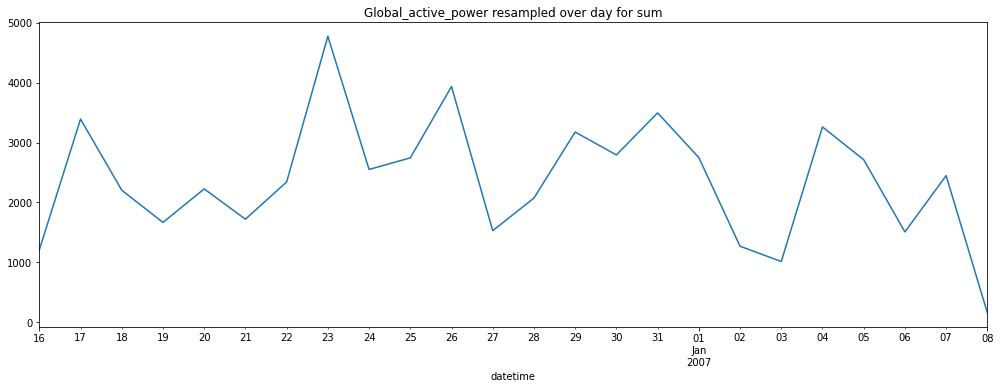

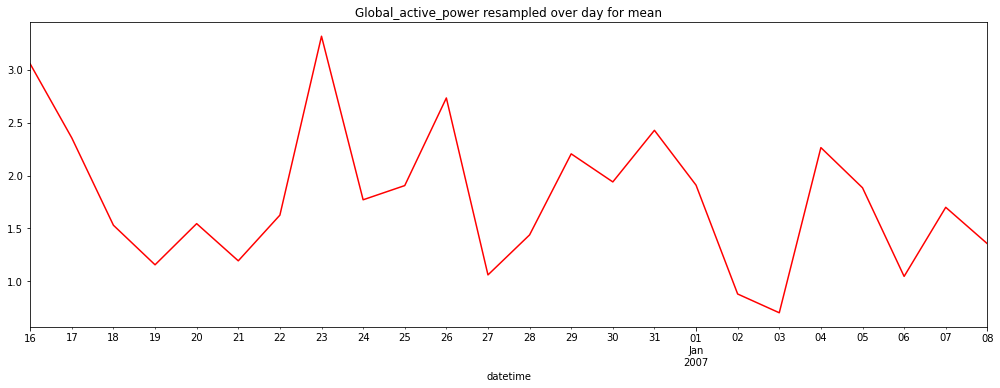

In [ ]:
plt.rcParams["figure.figsize"] = (14,5.5)
HandleMVMM.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()   

HandleMVMM.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

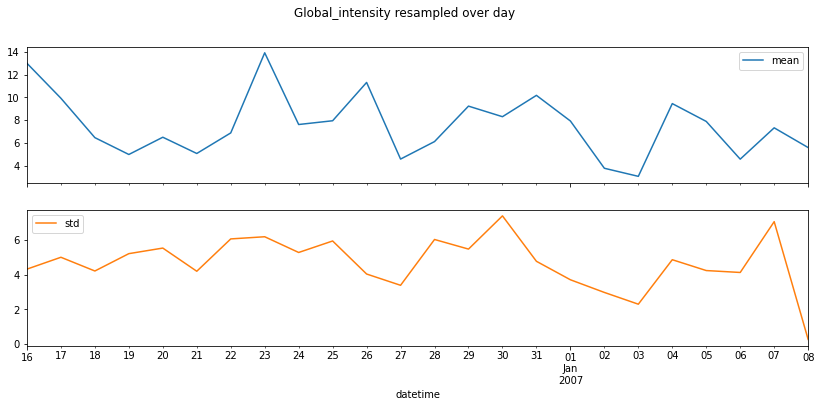

In [ ]:
#elow I show mean and std of 'Global_intensity' resampled over day 
plt.rcParams["figure.figsize"] = (14,5.5)
r = HandleMVMM.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

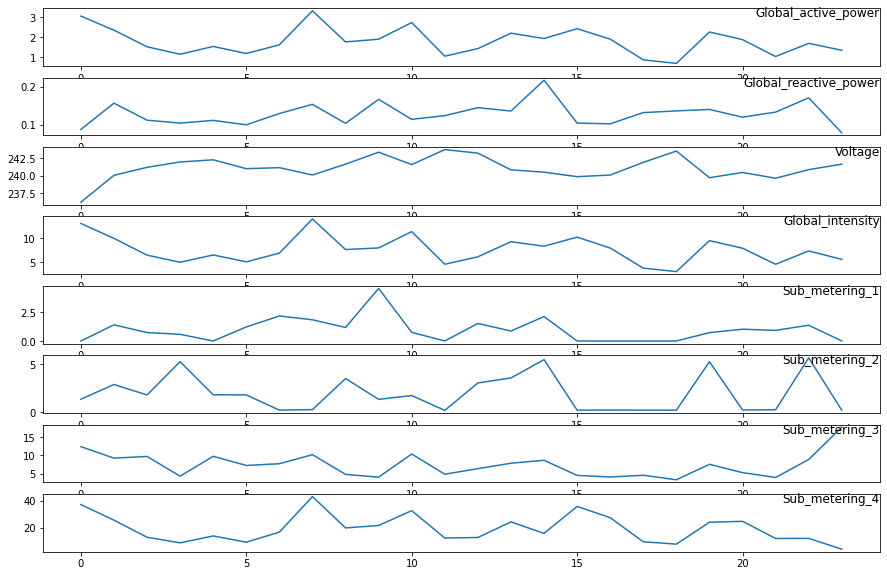

In [ ]:
# Below I compare the mean of different featuresresampled over day. 
plt.rcParams["figure.figsize"] = (14,5.5)
cols = [0, 1, 2, 3, 4, 5, 6,7]
i = 1
groups=cols
values = HandleMVMM.resample('D').mean().values
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(HandleMVMM.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

Seasonality Removal

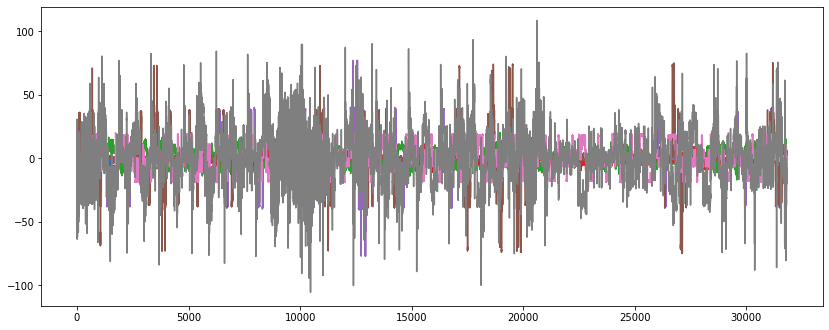

In [ ]:
#Seasonality removal is implemented but is not used for this LSTM model.
X =HandleMVM.values
diff = list()
cols=list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)
pyplot.plot(diff)

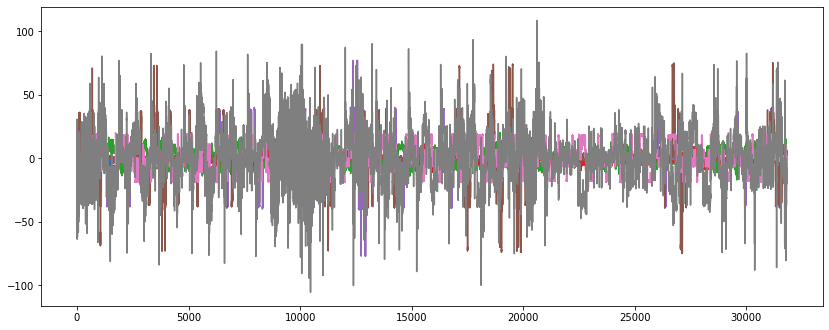

In [ ]:
Handle = HandleMVM.copy(deep=True)
Handle=diff
pyplot.plot(Handle)

In [ ]:
#Convert list back to dataframe
df2 = pd.DataFrame(Handle) 
print(df2) 

           0      1     2     3    4         5          6          7
0     -1.782 -0.346  5.29  -8.4  0.0 -1.000000 -17.000000 -11.700000
1     -2.858 -0.300  6.61 -12.6  0.0 -1.000000 -16.000000 -30.633333
2     -2.856 -0.322  7.24 -12.6  0.0 -2.000000 -17.000000 -28.600000
3     -3.872 -0.312  7.62 -15.4  0.0 -1.000000 -17.000000 -46.533333
4     -2.168 -0.340  5.34  -8.2  0.0 -1.000000 -17.000000 -18.133333
...      ...    ...   ...   ...  ...       ...        ...        ...
31823 -1.038 -0.252  3.92  -4.6  0.0  0.000000   0.000000 -17.300000
31824 -1.062 -0.348  4.89  -4.6  0.0  0.000000   1.000000 -18.700000
31825 -1.094 -0.354  5.64  -5.0  0.0  0.000000   0.000000 -18.233333
31826 -1.022 -0.294  5.02  -4.4  0.0  0.000000   1.000000 -18.033333
31827 -0.944 -0.130  5.37  -4.2  0.0  1.060954  -9.186425  -7.607863

[31828 rows x 8 columns]


In [ ]:
# save to file
HandleMVM.to_csv('pollutionBK.csv')
#df1.to_csv('pollution1.csv')

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load updated dataset
dataset = read_csv('/content/pollutionBK.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[1,2,3,4,5,6,7]], axis=1, inplace=True)
print(reframed.head())
 
data = reframed.values

   var1(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  \
1   0.449989  0.577982  0.505800  0.288022  0.575130      0.0  0.013333   
2   0.577982  0.579548  0.577726  0.274626  0.575130      0.0  0.026667   
3   0.579548  0.581114  0.582367  0.292356  0.575130      0.0  0.013333   
4   0.581114  0.388454  0.612529  0.368794  0.388601      0.0  0.013333   
5   0.388454  0.372119  0.605568  0.342790  0.367876      0.0  0.026667   

   var7(t)   var8(t)  
1     0.80  0.712109  
2     0.85  0.702421  
3     0.85  0.709184  
4     0.85  0.551804  
5     0.85  0.532977  


In [ ]:
def split_dataset(data, TRAIN_SPLIT=0.7, VAL_SPLIT=0.5, save_path=None):
    '''split the dataset into train, val and test splits'''
    n_train_hours = 365 * 24
    # split between validation dataset, train and test set
    train_data, val_data = train_test_split(data, train_size=0.70, shuffle=True, random_state=123)
    val_data, test_data = train_test_split(val_data, test_size=0.15, shuffle=True, random_state=123)

    return train_data, val_data, test_data

In [ ]:
train_data, val_data, test_data = split_dataset(data)
# split into input and outputs
train_X, train_y = train_data[:, :-1], train_data[:, -1]
val_X,val_y=val_data[:, :-1], val_data[:, -1]
test_X, test_y = test_data[:, :-1], test_data[:, -1]

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))

In [ ]:
print(len(train_data))
print(len(test_data))
print(len(val_data))

22534
1449
8209


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
313/313 - 7s - loss: 0.0642 - val_loss: 0.0046 - 7s/epoch - 21ms/step
Epoch 2/50
313/313 - 1s - loss: 0.0032 - val_loss: 0.0029 - 1s/epoch - 3ms/step
Epoch 3/50
313/313 - 1s - loss: 0.0026 - val_loss: 0.0026 - 1s/epoch - 4ms/step
Epoch 4/50
313/313 - 1s - loss: 0.0024 - val_loss: 0.0023 - 1s/epoch - 4ms/step
Epoch 5/50
313/313 - 1s - loss: 0.0020 - val_loss: 0.0024 - 1s/epoch - 4ms/step
Epoch 6/50
313/313 - 1s - loss: 0.0018 - v

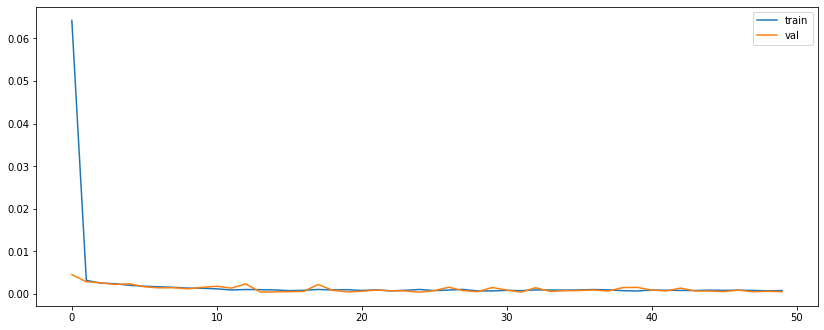

In [ ]:
import tensorflow  as tf
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
optim=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mae', optimizer=optim)
print(model.summary())
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(val_X,val_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [ ]:
print(len(train_X))
print(len(train_y))
print(len(test_X))
print(len(test_y))

22534
22534
1449
1449


In [ ]:
train_X.shape[1]
train_X.shape[2]
train_X[0]
train_y[0]
test_X[0]
train_y[0]

0.39460653

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

46/46 [==============================] - 0s 2ms/step
Test RMSE: 0.015


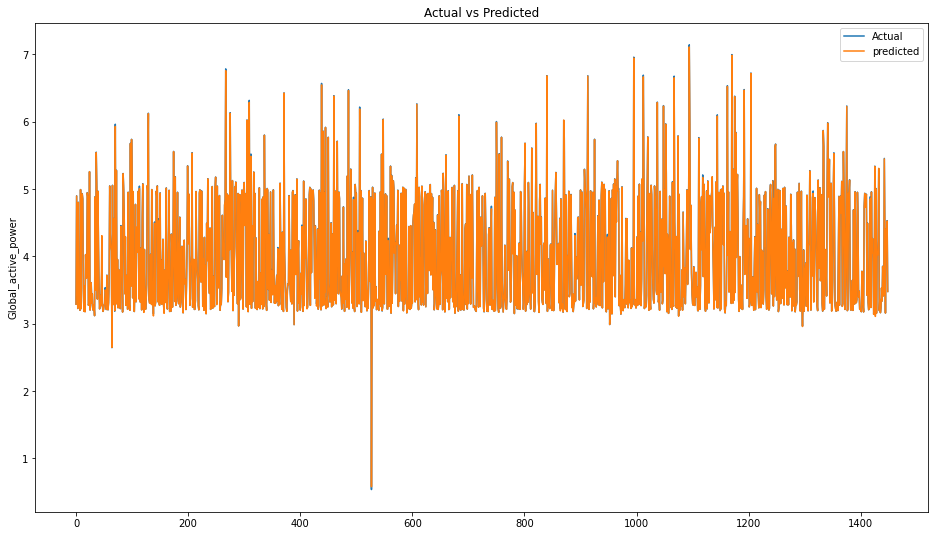

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot( list(inv_y))
#plt.plot( list(validate['Global_active_power']))
plt.plot( list(inv_yhat))
plt.title("Actual vs Predicted")
plt.ylabel("Global_active_power")
plt.legend(('Actual','predicted'))
plt.show()

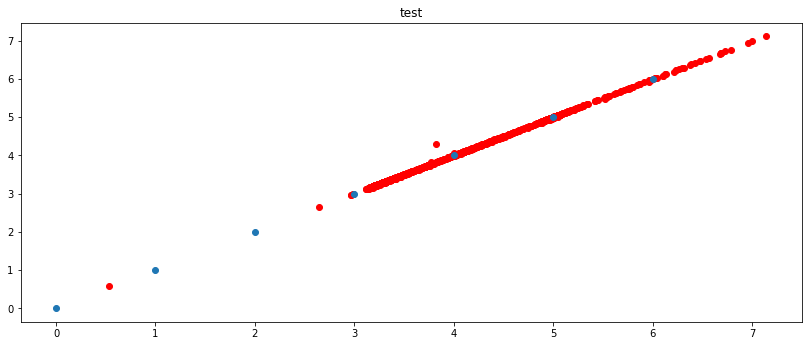

In [ ]:
#Method 1
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

plotGraph(list(inv_y) ,list(inv_yhat),"test")

Text(0.5, 1.0, 'Actual vs Predicted Values')

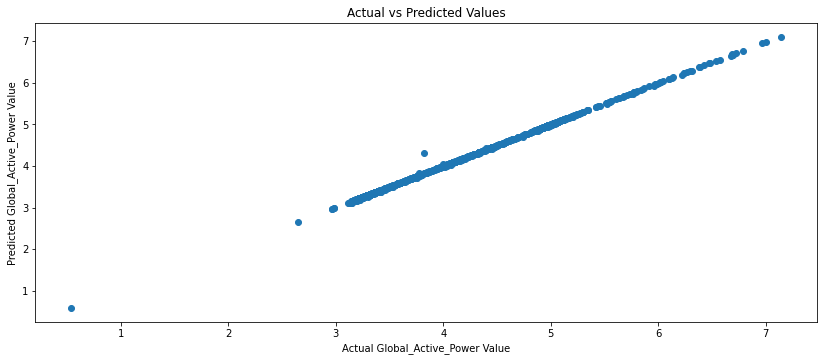

In [ ]:
#Method 2
plt.scatter(list(inv_y), list(inv_yhat))
plt.xlabel("Actual Global_Active_Power Value")
plt.ylabel("Predicted Global_Active_Power Value")
plt.title("Actual vs Predicted Values")

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')

In [ ]:
import sklearn.metrics as metrics
import numpy as np
timeseries_evaluation_metrics_func(inv_y,inv_yhat)

Evaluation metric results:-
MSE is : 0.00022295939561445266
MAE is : 0.004802095238119364
RMSE is : 0.014931824989616871
MAPE is : 0.1200817758217454
